#Bike rental count

The dataset contains features like:
Sure, let's break down each feature:
1. Date: This represents the date on which the data was recorded. It provides temporal information and can be useful for analyzing trends over
time.
2. Rented Bike Count: This is the target variable or dependent feature in your machine learning project. It represents the number of bikes rented
during a specific hour on the given date.
3. Hour: This indicates the hour of the day when the data was recorded. It provides temporal granularity and can influence bike rental patterns
based on factors such as commuting hours, leisure time, or night-time activities.
4. Temperature(°C): This is the temperature in Celsius recorded at the time of data collection. Temperature can impact bike rental behavior, with
more people likely to rent bikes on pleasant weather days.
5. Humidity(%): This represents the relative humidity recorded at the time of data collection. Humidity levels can affect comfort levels for outdoor
activities, potentially influencing bike rental decisions.. Wind speed (m/s): This is the wind speed measured in meters per second. Windy conditions may deter some individuals from cycling,
particularly if the wind speed is high.
7. Visibility (10m): This indicates the visibility measured in meters. Poor visibility due to fog, haze, or other atmospheric conditions may impact
safety and affect bike rental activity.. Dew point temperature(°C): The dew point temperature is the temperature at which air becomes saturated with moisture, leading to the
formation of dew. It provides information about atmospheric moisture levels.
9. Solar Radiation (MJ/m2): Solar radiation refers to the energy received from the sun per unit area. It can influence temperature and weather
conditions, which in turn may affect bike rental behavior.
10. Rainfall(mm): This represents the amount of rainfall measured in millimeters during the hour. Rainy conditions are typically associated with
reduced bike rental activity due to concerns about getting wet.
11. Snowfall (cm): Similar to rainfall, snowfall indicates the amount of snow recorded during the hour. Snowy conditions can significantly impact
cycling and may lead to decreased bike rental demand.
12. Seasons: This feature categorizes the season in which the data was recorded (e.g., spring, summer, fall, winter). Seasonality can have a
significant influence on bike rental patterns due to weather variations and seasonal activities.
13. Holiday: Indicates whether the date corresponds to a holiday or not. Holidays may affect bike rental behavior, with increased demand during
holidays for leisure activities or decreased demand during certain public holidays.
14. Functioning Day: This feature indicates whether the day is a functioning day or not. It may be used to distinguish between regular working days
and weekends or holidays, which can impact bike rental patterns.

# Target Variable

Rented Bike Count: This is the target variable or dependent feature in your machine learning project. It represents the number of bikes rented during a
specific hour on the given date.

1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor

# Importing warnings to ignore module warnings
import warnings
warnings.filterwarnings('ignore')

2. Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\SeoulBikeData.csv',encoding='latin1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# Showing datatypes of all the present data.
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

3.Data Wrangling

In [7]:
# Detailed information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
# Descriptive statistics of all the columns.
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,NaN,NaN,NaN


In [9]:
# handling the Null Values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no null value inthis dataset.

4. Handling the outliers.

<Axes: ylabel='Rented Bike Count'>

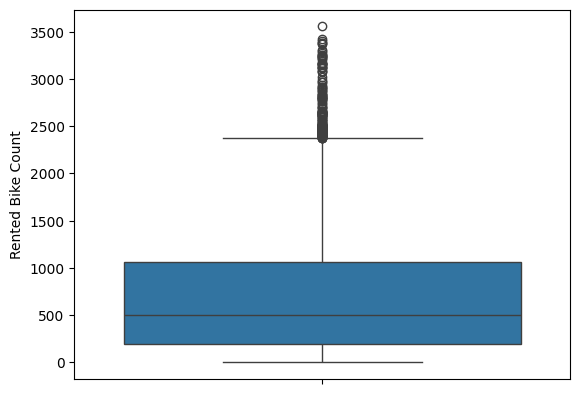

In [10]:
sns.boxplot(df['Rented Bike Count'])

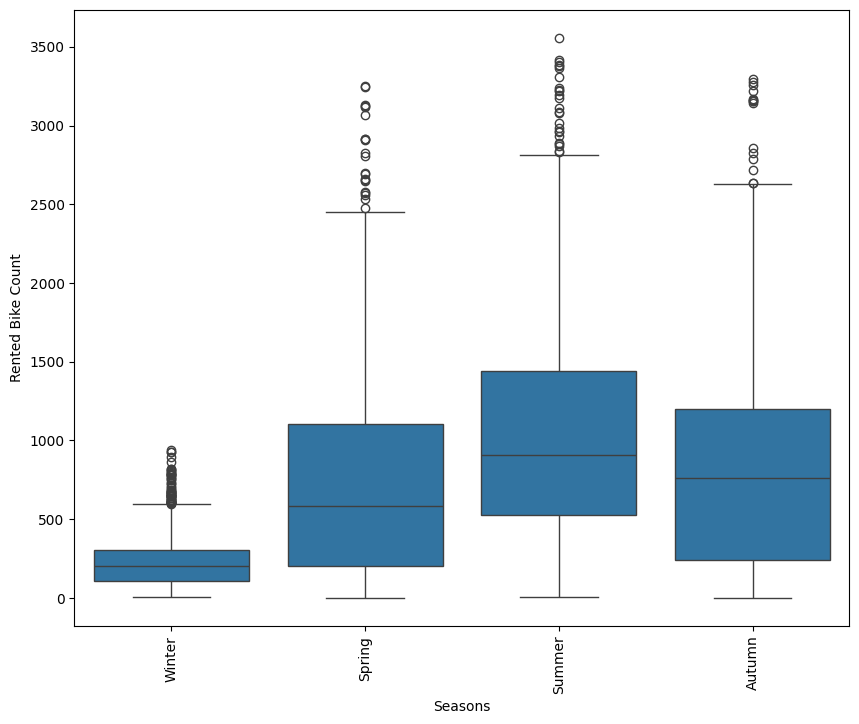

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Seasons',y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

In [12]:
def replacing_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr

        median = df[col].median()

        df[col] = np.where((df[col] <= lower) & (df[col] >= upper), median, df[col])

    return df

In [13]:
columns_with_outliers = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 
                         'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                         'Rainfall(mm)', 'Snowfall (cm)']

In [14]:
df = replacing_outliers(df, columns_with_outliers)

In [15]:
def capping_outliers(dataframe, value):

    q1 = dataframe[dataframe['Seasons']==value]['Rented Bike Count'].quantile(0.25)
    q3 = dataframe[dataframe['Seasons']==value]['Rented Bike Count'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    dataframe.loc[dataframe[(dataframe['Seasons']==value) & (dataframe['Rented Bike Count']>= upper)].index,'Rented Bike Count'] = upper
    dataframe.loc[dataframe[(dataframe['Seasons']==value) & (dataframe['Rented Bike Count']<= lower)].index,'Rented Bike Count'] = lower

    return dataframe

In [16]:
for i in ['Summer','Spring','Winter','Autumn']:
    df = capping_outliers(df,i)

In [17]:
def capping_outliers(dataframe, value):

    q1 = dataframe[dataframe['Holiday']==value]['Rented Bike Count'].quantile(0.25)
    q3 = dataframe[dataframe['Holiday']==value]['Rented Bike Count'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    dataframe.loc[dataframe[(dataframe['Holiday']==value) & (dataframe['Rented Bike Count']>= upper)].index,'Rented Bike Count'] = upper
    dataframe.loc[dataframe[(dataframe['Holiday']==value) & (dataframe['Rented Bike Count']<= lower)].index,'Rented Bike Count'] = lower

    return dataframe

In [18]:
for i in ['Holiday','No Holiday']:
    df = capping_outliers(df,i)

In [19]:
def capping_outliers(dataframe, value):

    q1 = dataframe[dataframe['Functioning Day']==value]['Rented Bike Count'].quantile(0.25)
    q3 = dataframe[dataframe['Functioning Day']==value]['Rented Bike Count'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    dataframe.loc[dataframe[(dataframe['Functioning Day']==value) & (dataframe['Rented Bike Count']>= upper)].index,'Rented Bike Count'] = upper
    dataframe.loc[dataframe[(dataframe['Functioning Day']==value) & (dataframe['Rented Bike Count']<= lower)].index,'Rented Bike Count'] = lower

    return dataframe

In [20]:
for i in ['Yes','No']:
    df = capping_outliers(df,i)

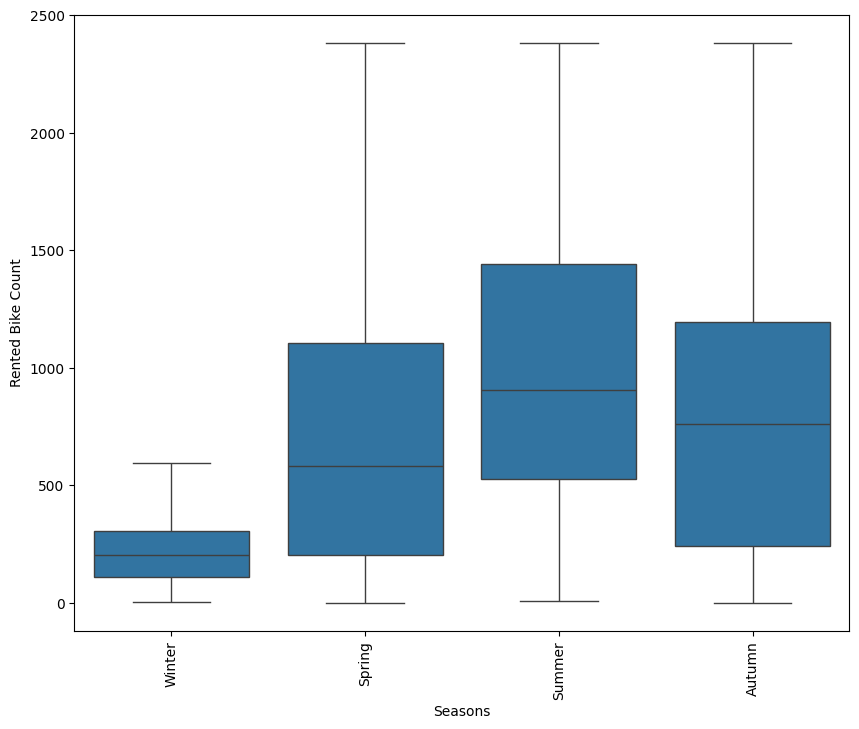

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Seasons',y='Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

Dropping unnecessary coulumns

• dropping date

• Dew point temperature(°C) because its correlated with Temperature(°C) we can keep only one

In [22]:
df.drop('Date', axis=1, inplace=True)
df.drop('Dew point temperature(°C)', axis=1, inplace=True)

Separating Categorical data and Numerical data 

In [23]:
# Separate categorical and numerical data.
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

Handling Skewness

Rented Bike Count
1.005302770346224


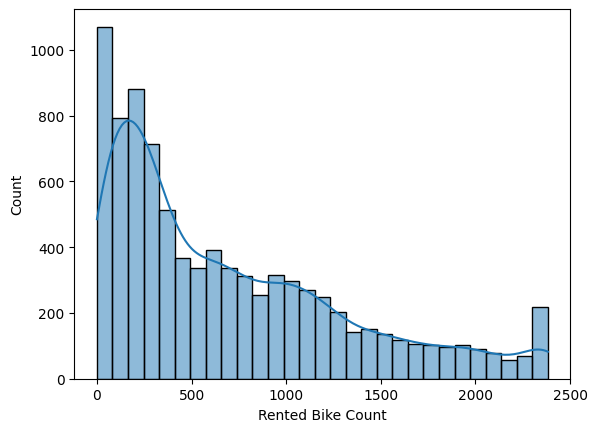

Hour
0.0


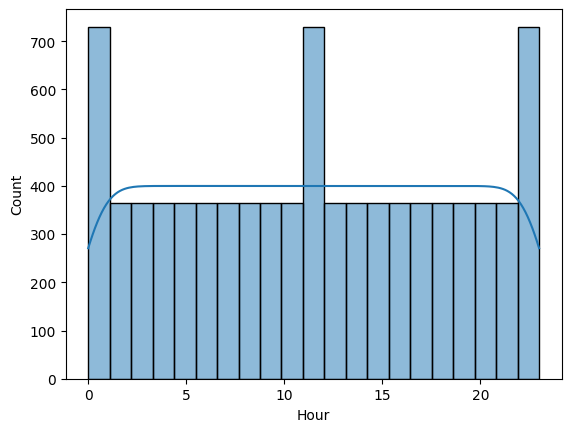

Temperature(°C)
-0.19829157303281608


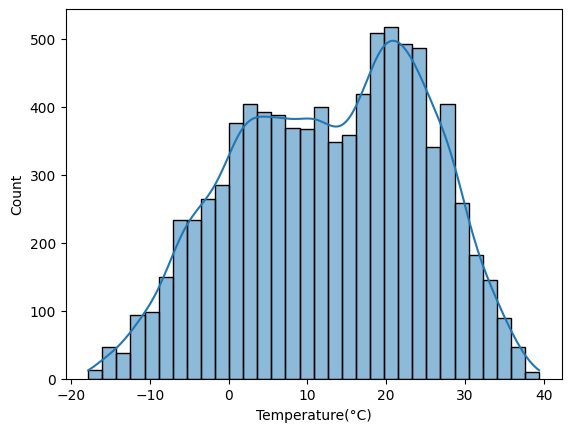

Humidity(%)
0.059568770212928474


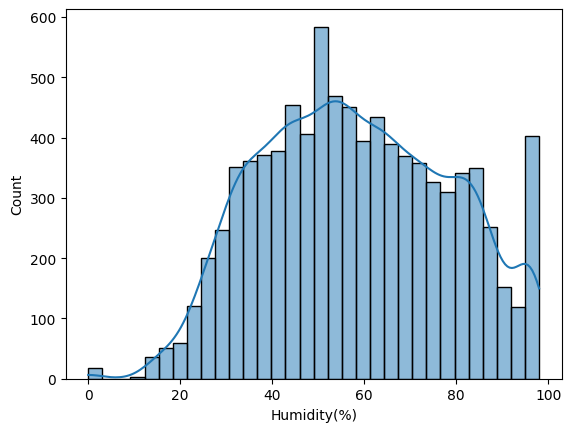

Wind speed (m/s)
0.8908022300197548


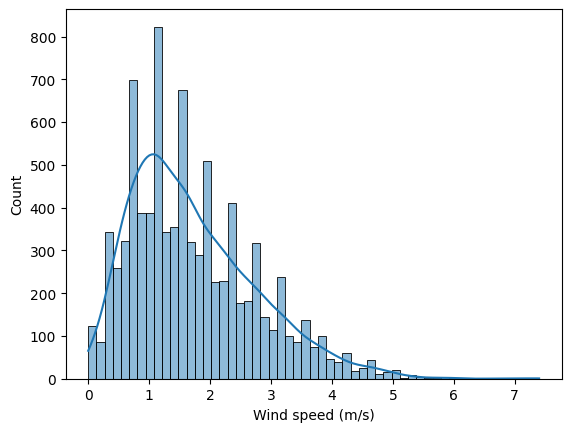

Visibility (10m)
-0.7016662743215496


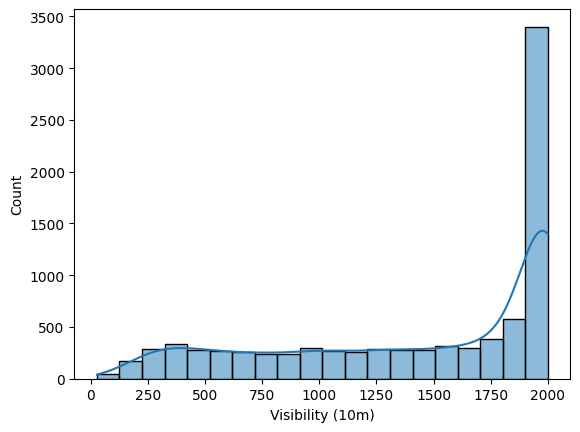

Solar Radiation (MJ/m2)
1.5037821640619484


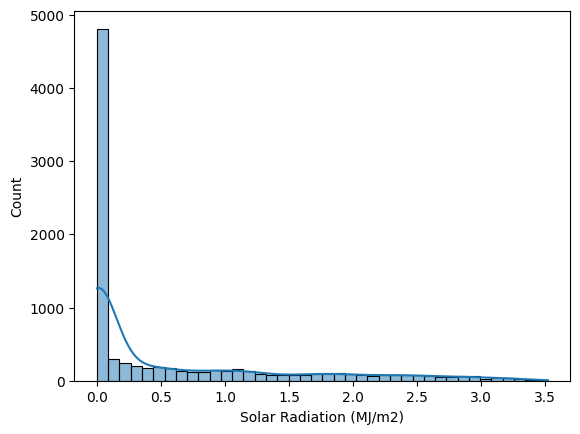

Rainfall(mm)
14.530743557004502


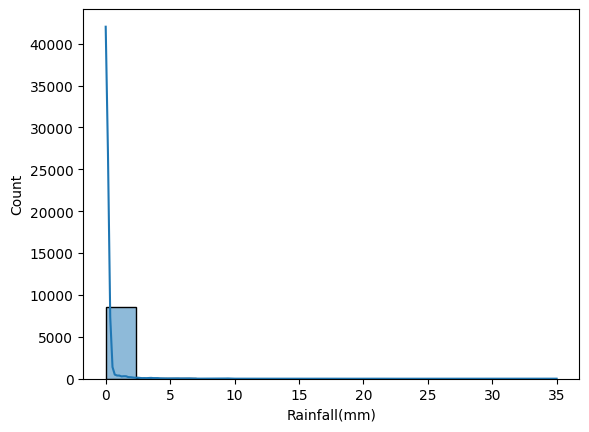

Snowfall (cm)
8.439355370132445


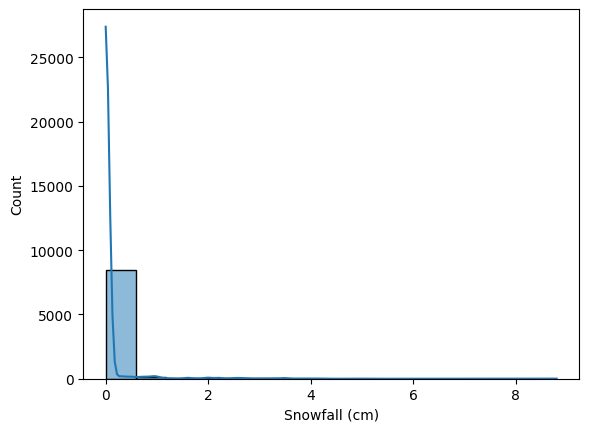

In [24]:
# To find the skewness of numerical data.
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

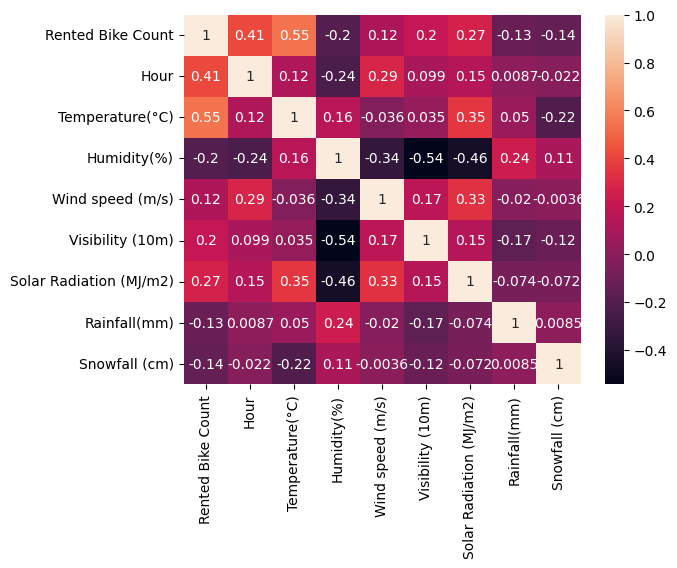

In [25]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

In [26]:
num_df['Solar Radiation (MJ/m2)'] = np.sqrt(num_df['Solar Radiation (MJ/m2)'])

In [27]:
skew(num_df['Solar Radiation (MJ/m2)'])

0.8073651846211284

In [28]:
num_df['Solar Radiation (MJ/m2)'] = np.sqrt(num_df['Solar Radiation (MJ/m2)'])

In [29]:
num_df['Solar Radiation (MJ/m2)'] = np.sqrt(num_df['Solar Radiation (MJ/m2)'])

In [30]:
num_df['Solar Radiation (MJ/m2)'] = np.sqrt(num_df['Solar Radiation (MJ/m2)'])

In [31]:
skew(num_df['Solar Radiation (MJ/m2)'])

0.0043196380962272456

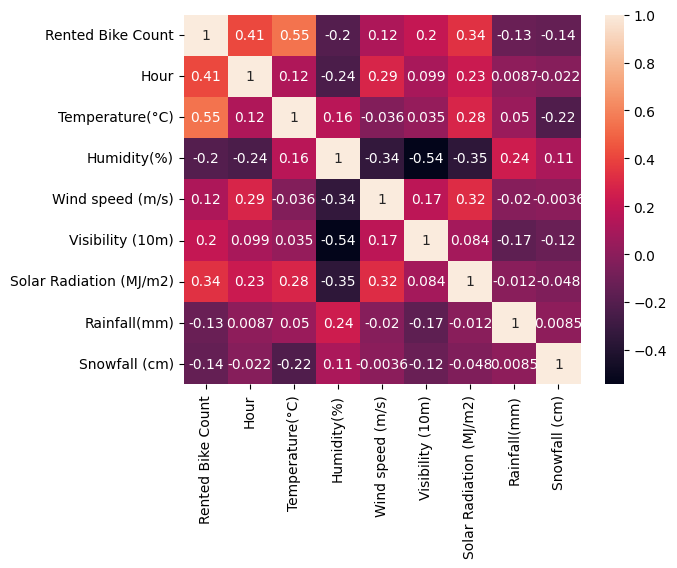

In [32]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

Converting categorical data into machine redable data

In [33]:
# Handling categorical data.
cat_df.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [34]:
cat_df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [35]:
cat_df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [36]:
cat_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [37]:
Season = pd.get_dummies(cat_df['Seasons'], dtype='int64')

In [38]:
Holiday = pd.get_dummies(cat_df['Holiday'],dtype='int64')

In [39]:
Functioning_Day = pd.get_dummies(cat_df['Functioning Day'],dtype='int64')

In [40]:
cat_df = pd.concat([Season,Holiday,Functioning_Day],axis=1)

In [41]:
cat_df.head()

,Autumn,Spring,Summer,Winter,Holiday,No Holiday,No,Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1


In [42]:
final_df = pd.concat([cat_df,num_df],axis=1)
final_df.head()

,Autumn,Spring,Summer,Winter,Holiday,No Holiday,No,Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,0,0,1,0,1,0,1,254.0,0.0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0
1,0,0,0,1,0,1,0,1,204.0,1.0,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,1,173.0,2.0,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0
3,0,0,0,1,0,1,0,1,107.0,3.0,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0
4,0,0,0,1,0,1,0,1,78.0,4.0,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0


We are using StandardScaler to scale the data

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
transformed_array = sc.fit_transform(final_df)

In [46]:
new_df = pd.DataFrame(transformed_array, columns=list(final_df.columns))
new_df.head()

,Autumn,Spring,Summer,Winter,Holiday,No Holiday,No,Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.708621,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.011027,-0.1318,-0.171891
1,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.788509,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.011027,-0.1318,-0.171891
2,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.838039,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.011027,-0.1318,-0.171891
3,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.943491,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.011027,-0.1318,-0.171891
4,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.989826,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.011027,-0.1318,-0.171891


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Autumn                   8760 non-null   float64
 1   Spring                   8760 non-null   float64
 2   Summer                   8760 non-null   float64
 3   Winter                   8760 non-null   float64
 4   Holiday                  8760 non-null   float64
 5   No Holiday               8760 non-null   float64
 6   No                       8760 non-null   float64
 7   Yes                      8760 non-null   float64
 8   Rented Bike Count        8760 non-null   float64
 9   Hour                     8760 non-null   float64
 10  Temperature(°C)          8760 non-null   float64
 11  Humidity(%)              8760 non-null   float64
 12  Wind speed (m/s)         8760 non-null   float64
 13  Visibility (10m)         8760 non-null   float64
 14  Solar Radiation (MJ/m2) 

In [49]:
new_df.corr()

,Autumn,Spring,Summer,Winter,Holiday,No Holiday,No,Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Autumn,1.000000e+00,-3.345477e-01,-3.345477e-01,-3.296859e-01,1.498458e-02,-1.498458e-02,0.253718,-0.253718,0.106258,-1.571549e-18,0.059728,0.028367,-0.128009,0.117413,-0.036621,-0.013247,-0.024742
Spring,-3.345477e-01,1.000000e+00,-3.369963e-01,-3.320989e-01,-4.479057e-02,4.479057e-02,-0.038413,0.038413,0.025751,8.288651e-18,0.007960,0.015694,0.083855,-0.187498,0.048142,0.017595,-0.099785
Summer,-3.345477e-01,-3.369963e-01,1.000000e+00,-3.320989e-01,-7.393239e-02,7.393239e-02,-0.108370,0.108370,0.299313,4.689298e-19,0.665846,0.192595,-0.064698,0.061958,0.108282,0.053928,-0.099785
Winter,-3.296859e-01,-3.320989e-01,-3.320989e-01,1.000000e+00,1.045574e-01,-1.045574e-01,-0.106795,0.106795,-0.434111,2.661494e-18,-0.738720,-0.238295,0.109186,0.008616,-0.120820,-0.058755,0.225875
Holiday,1.498458e-02,-4.479057e-02,-7.393239e-02,1.045574e-01,1.000000e+00,-1.000000e+00,0.027624,-0.027624,-0.076861,-1.622244e-18,-0.055931,-0.050278,0.023017,0.031773,-0.013941,-0.014269,-0.012591
No Holiday,-1.498458e-02,4.479057e-02,7.393239e-02,-1.045574e-01,-1.000000e+00,1.000000e+00,-0.027624,0.027624,0.076861,-4.435823e-20,0.055931,0.050278,-0.023017,-0.031773,0.013941,0.014269,0.012591
No,2.537183e-01,-3.841275e-02,-1.083703e-01,-1.067954e-01,2.762445e-02,-2.762445e-02,1.000000,-1.000000,-0.208046,-5.439377e-03,0.050170,0.020800,-0.005037,0.026000,-0.003523,-0.002055,-0.032089
Yes,-2.537183e-01,3.841275e-02,1.083703e-01,1.067954e-01,-2.762445e-02,2.762445e-02,-1.000000,1.000000,0.208046,5.439377e-03,-0.050170,-0.020800,0.005037,-0.026000,0.003523,0.002055,0.032089
Rented Bike Count,1.062579e-01,2.575142e-02,2.993126e-01,-4.341108e-01,-7.686068e-02,7.686068e-02,-0.208046,0.208046,1.000000,4.129213e-01,0.545863,-0.200717,0.119130,0.200784,0.336839,-0.125337,-0.144249
Hour,-1.571549e-18,8.288651e-18,4.689298e-19,2.661494e-18,-1.622244e-18,-4.435823e-20,-0.005439,0.005439,0.412921,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.225507,0.008715,-0.021516


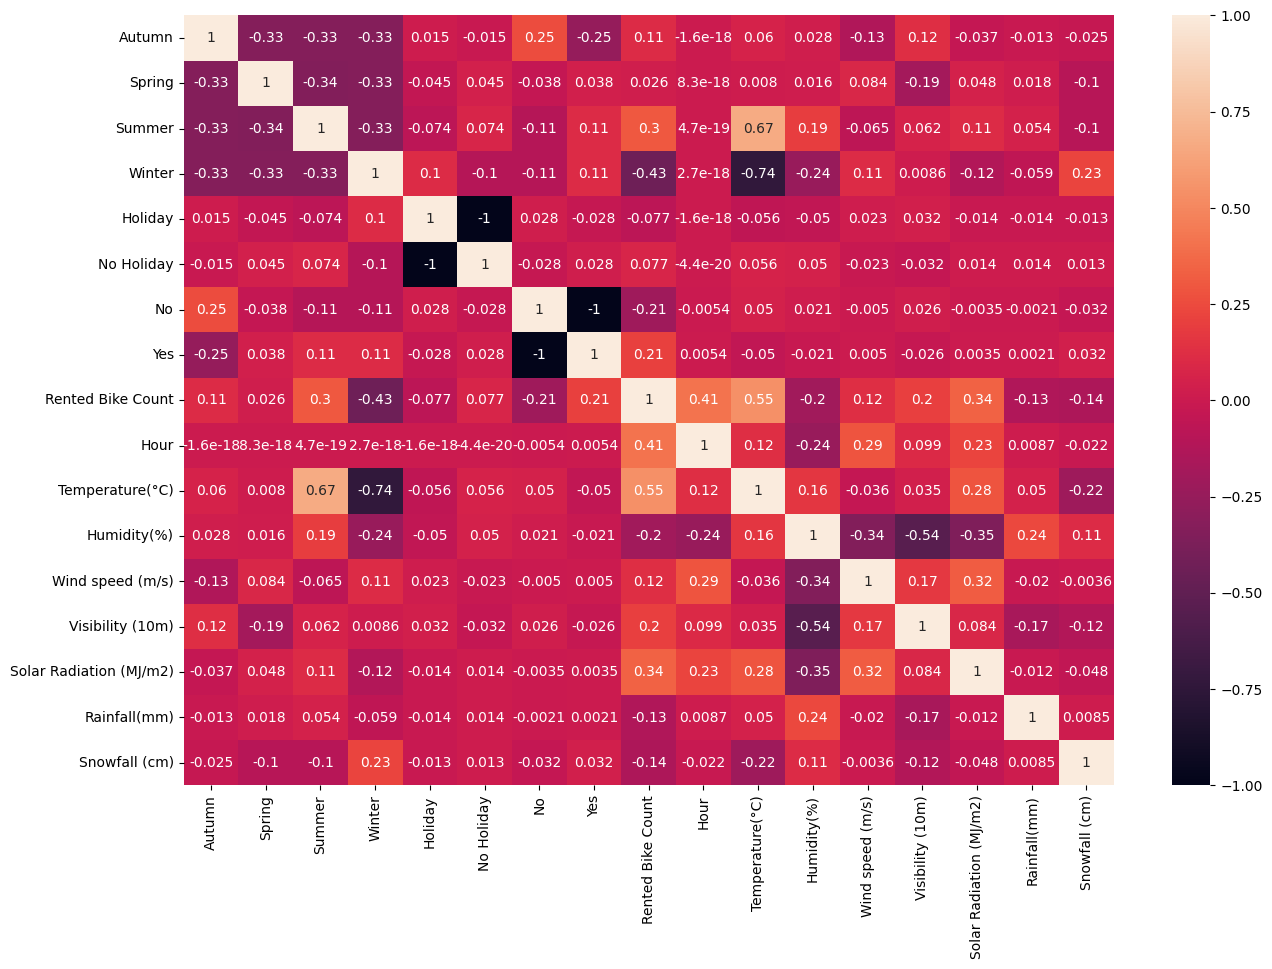

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

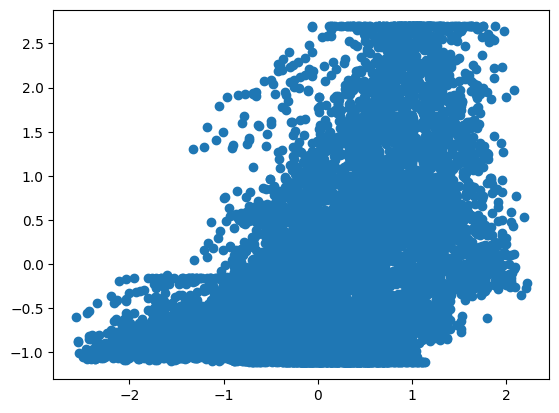

In [51]:
plt.scatter(new_df['Temperature(°C)'],new_df['Rented Bike Count'])
plt.show()

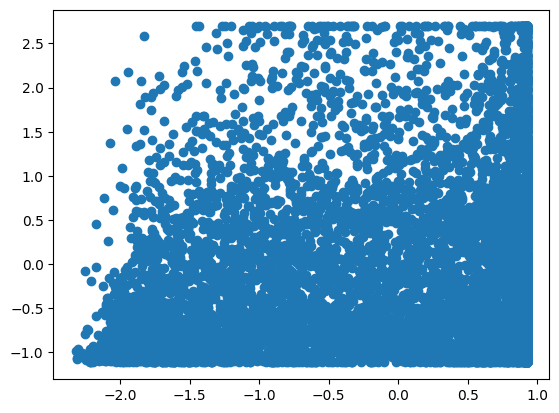

In [52]:
plt.scatter(new_df['Visibility (10m)'],new_df['Rented Bike Count'])
plt.show()

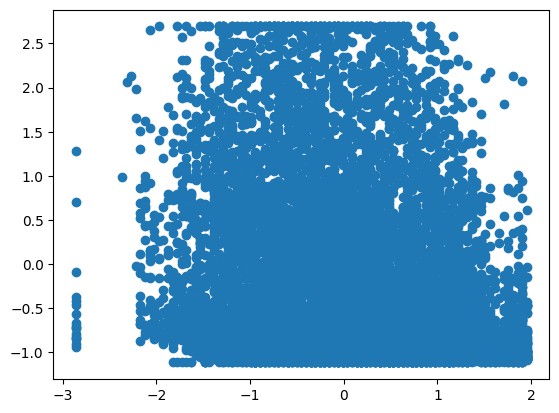

In [53]:
plt.scatter(new_df['Humidity(%)'],new_df['Rented Bike Count'])
plt.show()

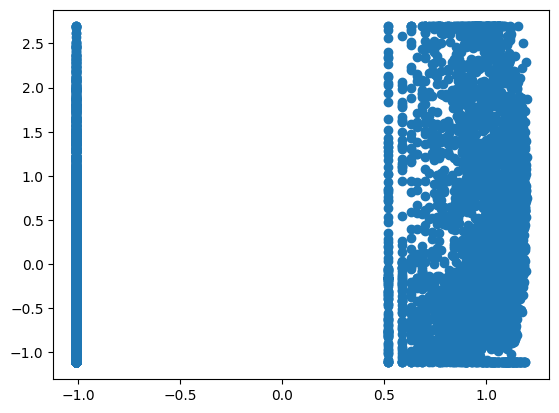

In [54]:
plt.scatter(new_df['Solar Radiation (MJ/m2)'],new_df['Rented Bike Count'])
plt.show()

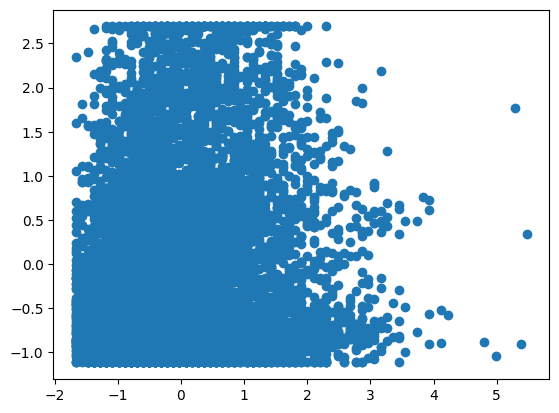

In [55]:
plt.scatter(new_df['Wind speed (m/s)'],new_df['Rented Bike Count'])
plt.show()

Now our dataset is ready for modelling.

5. Splitting the data and Standardization

In [56]:
X = new_df.drop('Rented Bike Count',axis=1)
y = new_df[['Rented Bike Count']]

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

6. Fitting models

In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be
using are: Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor.

The detailed step we will be following are as follows:

Initial fitting of the model.

Evaluating the performance of the model using metrics.

Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.

In [384]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [385]:
regressor.intercept_

array([0.00078137])

In [386]:
regressor.coef_

array([[-2.74649424e+11, -2.75649972e+11, -2.75649972e+11,
        -2.73634162e+11,  1.44170845e+11,  1.44170845e+11,
         4.44718398e+11,  4.44718398e+11,  3.08430195e-01,
         3.84819031e-01, -1.50218964e-01, -1.12762451e-02,
         5.04608154e-02,  8.31069946e-02, -1.13588333e-01,
         6.19888306e-03]])

In [387]:
y_pred_train = regressor.predict(X_train)

In [388]:
y_pred = regressor.predict(X_test)

In [389]:
mean_squared_error(y_test, y_pred)

0.31180466495136216

In [390]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.6619116284557224

In [391]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.558394721457288

In [392]:
r2_score(y_train, y_pred_train)

0.5627695928760079

In [393]:
r2_score(y_test, y_pred)

0.5549003284126814

      Rented Bike Count
4059           0.013676
6914           0.042243
233            0.124916
982            0.090391
5967           1.252351
...                 ...
2375           0.475548
5356           0.626087
253            0.041130
3169           0.013999
3181           0.044122

[88 rows x 1 columns]


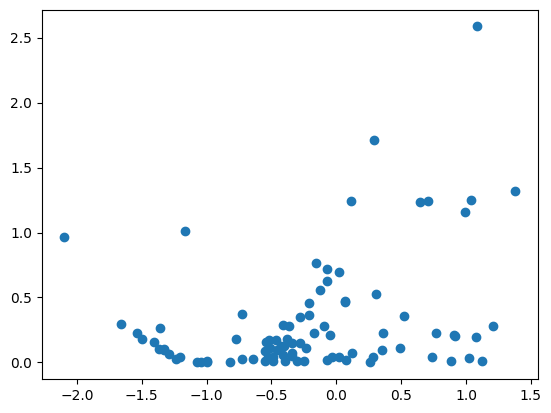

In [394]:
residual = (y_test - y_pred)**2
print(residual)
plt.scatter(y_pred,residual)

<Axes: ylabel='Count'>

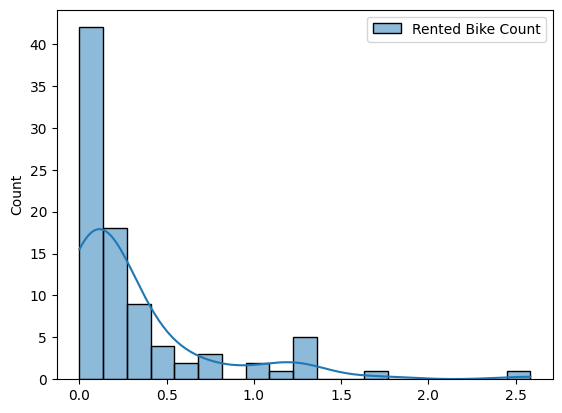

In [395]:
sns.histplot(residual, kde=True)

In [396]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.004)

lasso.fit(X_train, y_train)

Lasso(alpha=0.004)

In [397]:
y_pred_l = lasso.predict(X_test)

In [398]:
y_train_pred_l = lasso.predict(X_train)

In [399]:
mean_squared_error(y_test, y_pred_l)

0.3135827732715593

In [400]:
mean_squared_error(y_train, y_train_pred_l)

0.4382259175410161

In [401]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_train_pred_l))

0.6619863424127541

In [402]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred_l))

0.5599846187812298

In [403]:
r2_score(y_train, y_train_pred_l)

0.562670881639888

In [404]:
r2_score(y_test, y_pred_l)

0.5523620872690158

6.1 Decision Tree Regressor

In [405]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [406]:
y_train_prediction = dt_model.predict(X_train)
y_predicted = dt_model.predict(X_test)

In [407]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  3.540868396647588e-32
r2_score -  1.0
mean_absolute_error 2.8318880655798506e-17
root_mean_squared_error -1.881719531877051e-16


In [408]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.13403352774278324
r2_score -  0.808667778625735
mean_absolute_error 0.22164390828123384
root_mean_squared_error 0.3661058968970361


Let's store metric values of train and test set for later comparisons.

In [409]:
# train values before hypertune
dict1 = {'model' : 'Decision Tree Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

# test values before hypertune
dict2 = {'model' : 'Decision Tree Regressor - test, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

• From evaluation metrics result we can conclude our model is overfitting

• We need to do hyperparameter tunning to prevent overfitting

Cross-validation using GridSearch

In [410]:
# Setting the parameters to tune
param_dict = {"criterion":['squared_error', 'absolute_error'],
              "max_depth":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

In [411]:
grid = GridSearchCV(dt_model,param_grid=param_dict,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                       0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20,
                                       30, 40, 45, 50, 55, 60, 100]})

In [412]:
grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10)

In [413]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 10}

In [414]:
grid.best_score_

0.817443143963571

In [415]:
dt_model_tunned = grid.best_estimator_

In [416]:
y_train_prediction2  =dt_model_tunned.predict(X_train)
y_predicted2  =dt_model_tunned.predict(X_test)

In [417]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  0.1266179327182181
r2_score -  0.8736411821670599
mean_absolute_error 0.20134550966817125
root_mean_squared_error -0.35583413652742496


In [418]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.17931830786787994
r2_score -  0.7440239710523986
mean_absolute_error 0.24073533318868562
root_mean_squared_error 0.42345992474835203


Let's store metric values of train and test set for later comparisons.

In [419]:
dict3 = {'model' : 'Decision Tree Regressor - train, after hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}

dict4 = {'model' : 'Decision Tree Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

6.2 Random Forest Regressor

In [420]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [421]:
y_train_prediction = rf_model.predict(X_train)
y_predicted = rf_model.predict(X_test)

In [422]:
# train results
print('The evaluation metric values for training set - Random Forest:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))

The evaluation metric values for training set - Random Forest:
mean_squared_error -  0.016988710046931085
r2_score -  0.9830460561789923
mean_absolute_error 0.07894850012595339
root_mean_squared_error -0.13034074591980468


In [423]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.1023850538111971
r2_score -  0.8538458241671195
mean_absolute_error 0.19600822343145144
root_mean_squared_error 0.31997664572777357


Let's store metric values of train and test set for later comparisons.

In [424]:
# train values before hypertune
dict5 = {'model' : 'Random Forest Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

# test values before hypertune
dict6 = {'model' : 'Random forest Regressor - test, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

In [425]:
# Setting the parameters to tune
# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))
# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))
# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

In [426]:
rf_random = GridSearchCV(estimator=rf_model,param_grid= param_dict1,cv = 5,n_jobs=-1)
rf_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [80, 100, 120, 140, 160, 180]})

In [427]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=18, n_estimators=180)

In [428]:
rf_random.best_score_

0.8778602205410444

In [429]:
rf_model_tunned = rf_random.best_estimator_

In [430]:
y_train_prediction2 = rf_model_tunned.predict(X_train)
y_predicted2 = rf_model_tunned.predict(X_test)

In [431]:
# train results
print('The evaluation metric values for training set - Random Forest:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Random Forest:
mean_squared_error -  0.02002291076053406
r2_score -  0.9800180647483316
mean_absolute_error 0.08848700100327336
root_mean_squared_error -0.14150233482361363


In [432]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.09552792930837671
r2_score -  0.8636343366793194
mean_absolute_error 0.188577141433372
root_mean_squared_error 0.30907592806360173


Let's store the scores of RandomSearch for later comparisons.

In [433]:
dict7 = {'model' : 'Random Forest Regressor - train, fter hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}

dict8 = {'model' : 'Random Forest Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

In [434]:
xgb_model=XGBRFRegressor()
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [435]:
y_train_prediction = xgb_model.predict(X_train)
y_predicted = xgb_model.predict(X_test)

In [436]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction))
print('r2_score - ',r2_score(y_train, y_train_prediction))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  0.19152486614886496
r2_score -  0.8088670763086895
mean_absolute_error 0.296143170604756
root_mean_squared_error -0.43763554031735696


In [437]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted))
print('r2_score - ',r2_score(y_test, y_predicted))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.15450341319668645
r2_score -  0.7794471148028137
mean_absolute_error 0.2639679696695966
root_mean_squared_error 0.39306922188933396


let's store the scores of evaluetion metrics for later comparisons.

In [438]:
# train values before hypertune
dict9 = {'model' : 'XGB Regressor - train, before hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction),
         'r2_score' : r2_score(y_train, y_train_prediction),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction)}

# test values before hypertune
dict10 = {'model' : 'XGB Regressor - test, befor hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted),
         'r2_score' : r2_score(y_test, y_predicted),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted)}

• From evaluation metrics result we can conclude our model is underfitting

• We need to do hyperparameter tunning to prevent overfitting

Cross-validation using GridSearch

In [439]:
# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))
# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))
# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))
# gamma
gamma=list(np.linspace(10,20,num=20))
# subsamples
subsample=[0.3,0.5,0.6] 
# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [440]:
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                                  17.36842105263158,
                                                  17.894736842105264,
                                                  18.421052631578945,
                                                  18.94736842105263,
                                                  19.473684210526315, 20.0],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [5, 7, 9, 11, 13],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=0)

In [441]:
xgb_random.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=10.526315789473685,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.13, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=12, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=5, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [442]:
xgb_model_tunned = xgb_random.best_estimator_

In [443]:
y_train_prediction2 = xgb_model_tunned.predict(X_train)
y_predicted2 = xgb_model_tunned.predict(X_test)

In [444]:
# train results
print('The evaluation metric values for training set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_train, y_train_prediction2))
print('r2_score - ',r2_score(y_train, y_train_prediction2))
print('mean_absolute_error', mean_absolute_error(y_train, y_train_prediction2))
print('root_mean_squared_error', - root_mean_squared_error(y_train, y_train_prediction2))

The evaluation metric values for training set - Decision Tree:
mean_squared_error -  0.8056709011498355
r2_score -  0.19597784890192704
mean_absolute_error 0.7307301066788662
root_mean_squared_error -0.8975917229731096


In [445]:
# test results
print('The evaluation metric values for testing set - Decision Tree:')
print('mean_squared_error - ', mean_squared_error(y_test, y_predicted2))
print('r2_score - ',r2_score(y_test, y_predicted2))
print('mean_absolute_error', mean_absolute_error(y_test, y_predicted2))
print('root_mean_squared_error', root_mean_squared_error(y_test, y_predicted2))

The evaluation metric values for testing set - Decision Tree:
mean_squared_error -  0.6402357998992511
r2_score -  0.08606645023077963
mean_absolute_error 0.6807654453646983
root_mean_squared_error 0.8001473613649245


lets store result

In [446]:
dict11 = {'model' : 'XGB Regressor - train, after hypertunning',
         'mean_squared_error' : mean_squared_error(y_train, y_train_prediction2),
         'r2_score' : r2_score(y_train, y_train_prediction2),
         'mean_absolute_error' : mean_absolute_error(y_train, y_train_prediction2),
         'root_mean_squared_error' : root_mean_squared_error(y_train, y_train_prediction2)}


dict12 = {'model' : 'XGB Regressor - test, After hypertunning',
         'mean_squared_error' : mean_squared_error(y_test, y_predicted2),
         'r2_score' : r2_score(y_test, y_predicted2),
         'mean_absolute_error' : mean_absolute_error(y_test, y_predicted2),
         'root_mean_squared_error' : root_mean_squared_error(y_test, y_predicted2)}

Let's check training and test set values that have been obtained from our models.

In [447]:
data = pd.DataFrame([dict1,dict2,dict3,dict4,dict5,dict6,dict7,dict8,dict9,dict10,dict11,dict12])

In [382]:
data

,model,mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
0,"Decision Tree Regressor - train, before hypert...",0.194181,0.806340,0.297825,0.440660
1,"Decision Tree Regressor - test, befor hypertun...",0.150800,0.793149,0.277558,0.388330
2,"Decision Tree Regressor - train, after hypertu...",0.105955,0.894329,0.200893,0.325508
3,"Decision Tree Regressor - test, After hypertun...",0.195320,0.732081,0.280668,0.441950
4,"Random Forest Regressor - train, before hypert...",0.017015,0.983031,0.078847,0.130441
5,"Random forest Regressor - test, befor hypertun...",0.126349,0.826687,0.210457,0.355457
6,"Random Forest Regressor - train, fter hypertun...",0.016621,0.983424,0.078454,0.128921
7,"Random Forest Regressor - test, After hypertun...",0.120600,0.834574,0.209922,0.347275
8,"XGB Regressor - train, before hypertunning",0.194181,0.806340,0.297825,0.440660
9,"XGB Regressor - test, befor hypertunning",0.150800,0.793149,0.277558,0.388330


**After having experimented two machine learning algorithms namely; Random forest and Xgboost, we can say that the best performance is given by xgboost model with accuracies of 0.98 and 0.86 for training and test set respectively using RandomSearch.** 

**The best hyperparameter values are:**

1. **n_estimators = 180**

2. **max_depth = 20**

**8. Conclusion**

We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our
predictions for bike rent demand. We started with simple EDA where we analysed our dependent variable as well as other
independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing
values and outliers and did some feature modifications.

Finally we implemented 3 machine learning algorithms namely; DecisionTree, RandomForest and XGBoost. We tried
hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our
RandomForest model.

The r2_score of our best model was 0.98 and 0.90 for training and test set respectively. Performance can be improved even
further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and
become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will
always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!